In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
!unzip -q '/content/archive.zip' -d '/content/Dataset/'

Explanation: This step is to read the dataset into a Pandas DataFrame. It assumes your dataset is in a CSV file format. Replace your_dataset.csv with the actual filename.

In [22]:
df = pd.read_csv('/content/Dataset/train.csv')

In [23]:
df.head(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


Explanation: The "v.id" column seems to be an identifier for the car, and it might not contribute to predicting the current price. Therefore, we drop it to simplify the dataset.

In [24]:
df.drop(['v.id'], axis=1)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,535559,732439,2,140478,4,5,9,184,112,128,74398.0


Explanation: The "years" column represents the number of years since the car was manufactured. We create a new feature "car_age" to better represent the age of the car, and then we drop the original "years" column.

In [25]:
df['car_age'] = df['years']
df.drop('years', axis=1)

,v.id,on road old,on road now,km,rating,condition,economy,top speed,hp,torque,current price,car_age
0,1,535651,798186,78945,1,2,14,177,73,123,351318.0,3
1,2,591911,861056,117220,5,9,9,148,74,95,285001.5,6
2,3,686990,770762,132538,2,8,15,181,53,97,215386.0,2
3,4,573999,722381,101065,4,3,11,197,54,116,244295.5,4
4,5,691388,811335,61559,3,9,12,160,53,105,531114.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,125092,1,6,11,171,95,97,190744.0,5
996,997,599626,848195,83370,2,9,14,161,101,120,419748.0,4
997,998,646344,842733,86722,1,8,9,196,113,89,405871.0,7
998,999,535559,732439,140478,4,5,9,184,112,128,74398.0,2


Explanation: Checking for missing values
In case of a missing value use this code to replace them with the mean


```
df['rating'].fillna(df['rating'].mean(), inplace=True)
```



In [26]:
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
car_age          0
dtype: int64

Explanation: This step separates the dataset into features (independent variables X) and the target variable (dependent variable y). The goal is to predict the "current price," so it is set as the target variable.

In [27]:
X = df.drop('current price', axis=1)
y = df['current price']

Explanation: Splitting the data into training and testing sets allows us to train the model on one subset and evaluate its performance on another. The test_size parameter specifies the proportion of the dataset to include in the test split, and random_state ensures reproducibility.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation: We define a preprocessing pipeline using ColumnTransformer to apply different preprocessing steps to numerical and categorical features. For numerical features, we impute missing values with the mean and scale the features using StandardScaler. For categorical features, we use one-hot encoding.

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define preprocessing steps using ColumnTransformer and Pipeline
numeric_features = ['on road old', 'on road now', 'km', 'rating', 'economy', 'top speed', 'hp', 'torque', 'car_age']
categorical_features = ['condition']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [30]:
X_train_transformed = preprocessor.fit_transform(X_train)

These are used for Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Explanation: A pair plot is a grid of scatterplots where each variable is plotted against every other variable. It helps visualize relationships between numeric features.

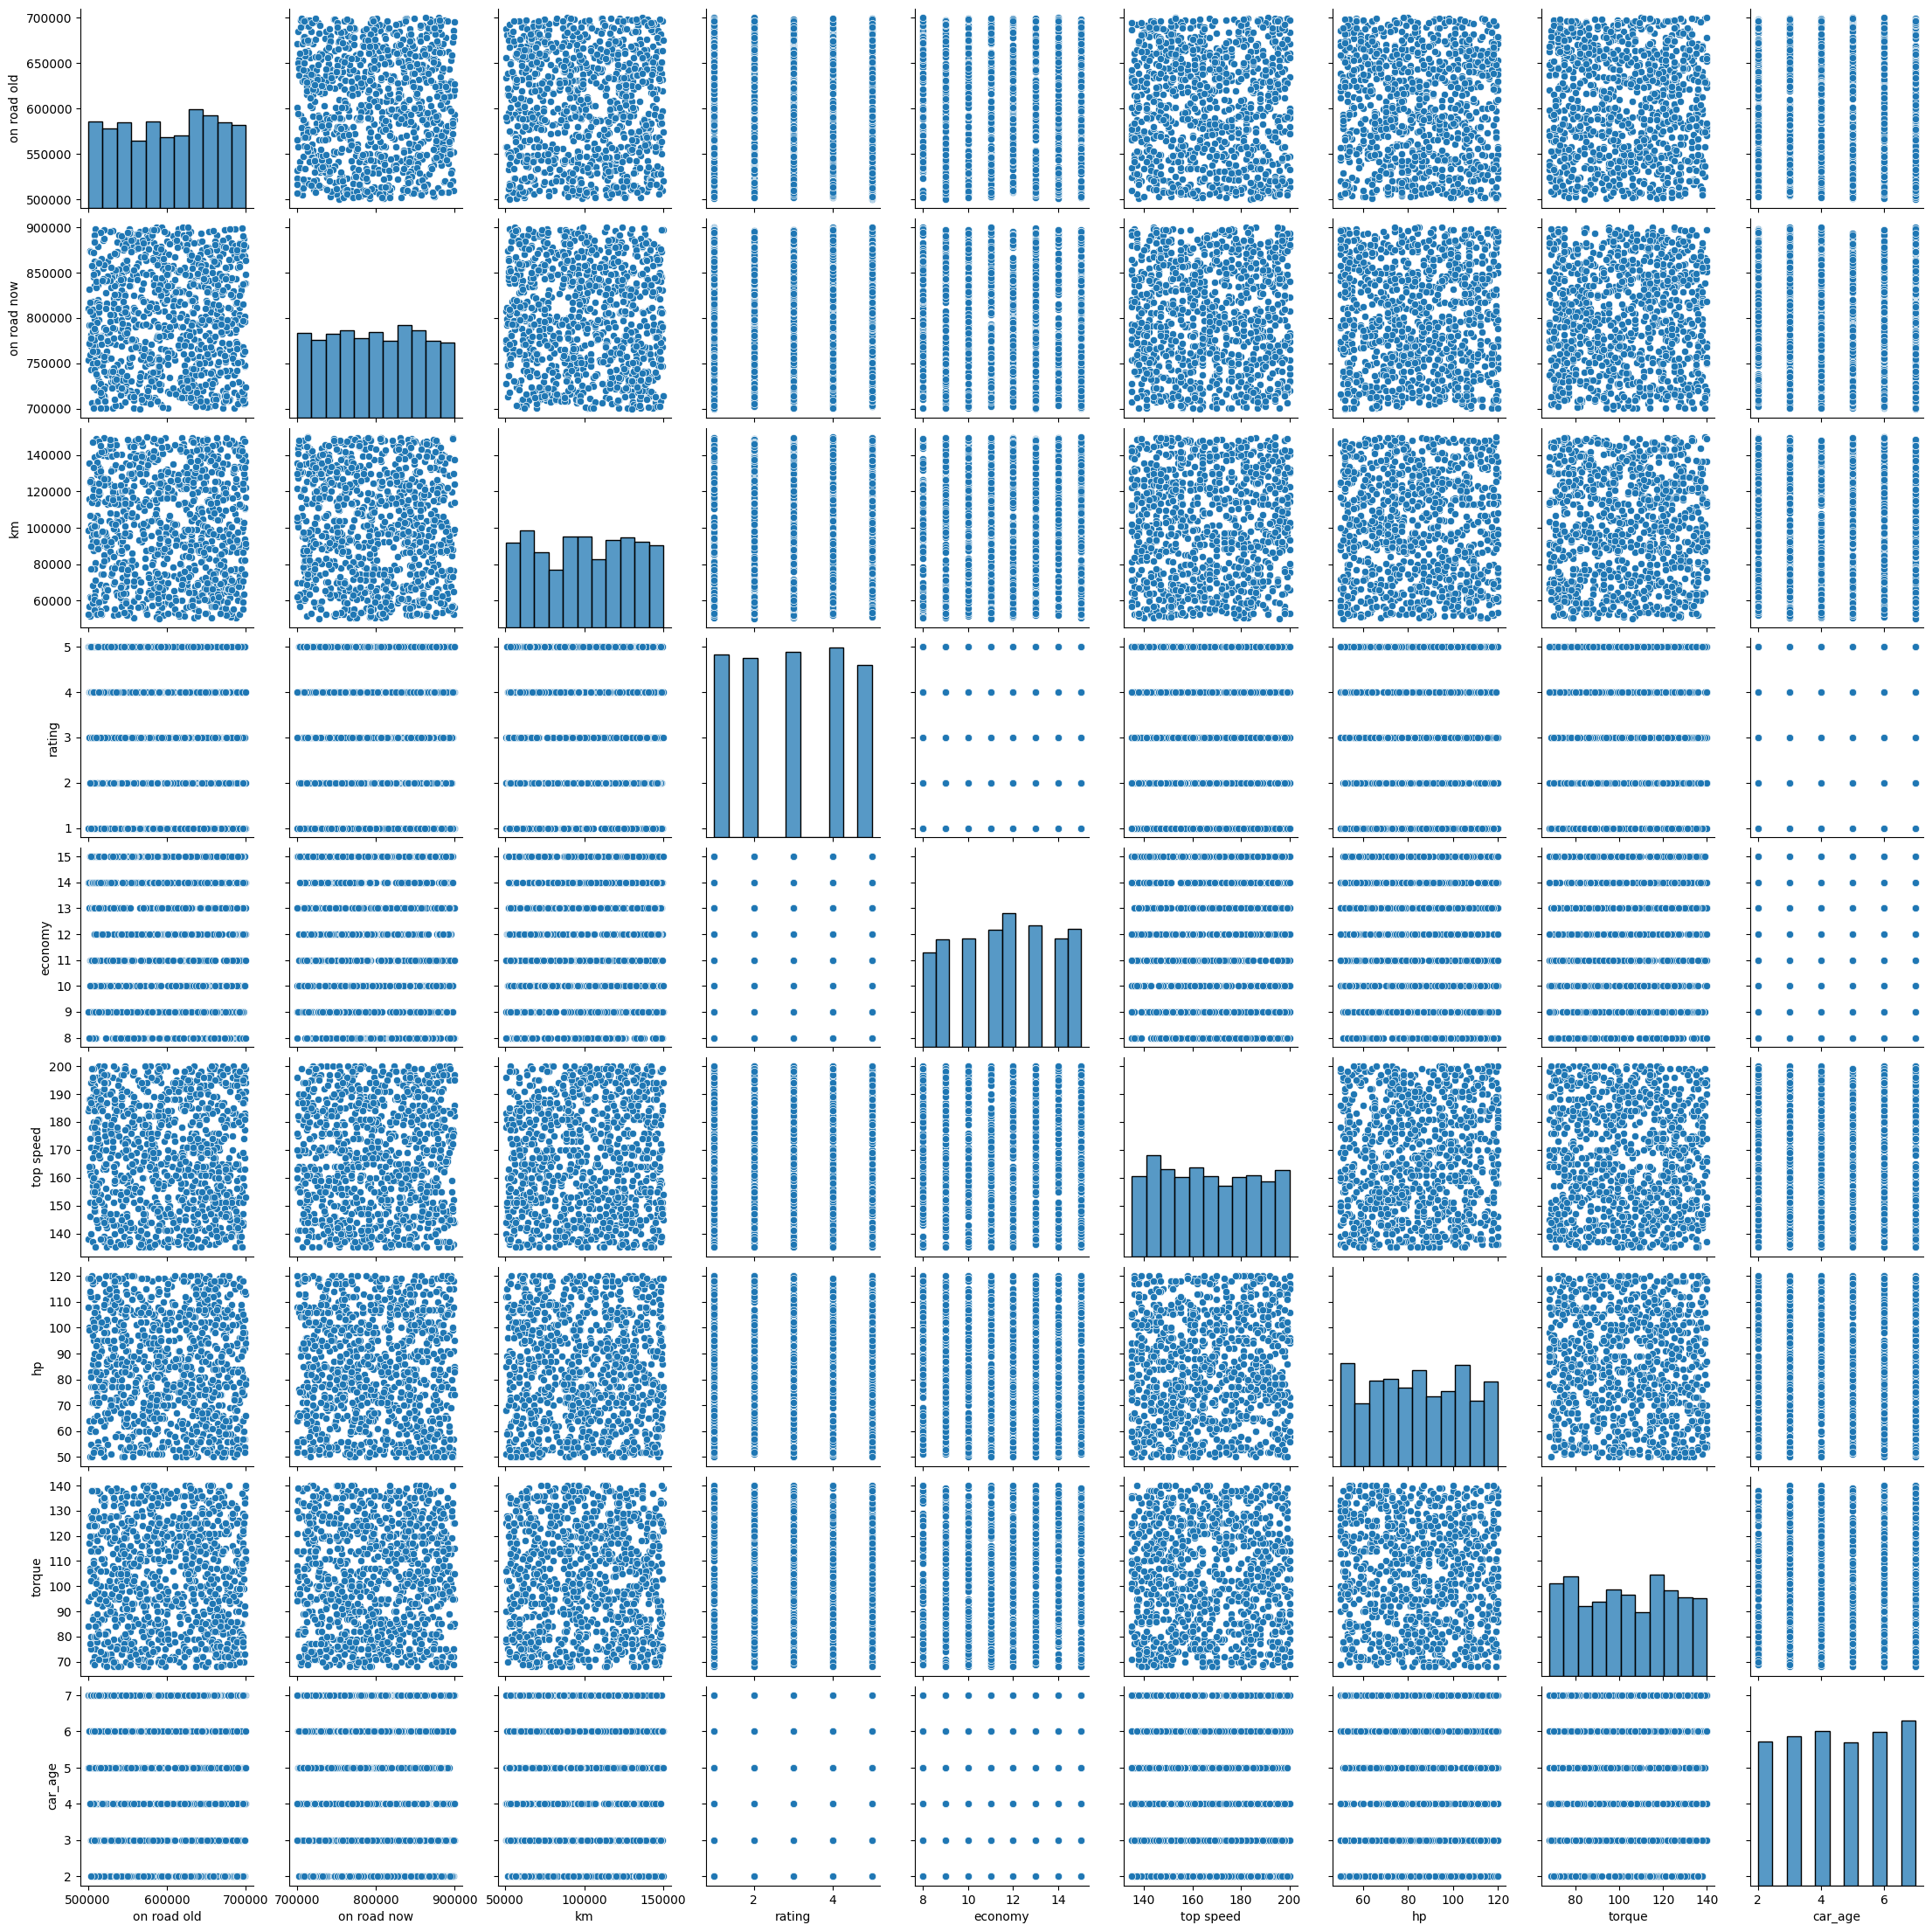

In [32]:
sns.pairplot(df[numeric_features])
plt.show()

Explanation: A correlation heatmap shows the correlation coefficients between numeric features. It's useful for identifying relationships and potential multicollinearity. corr_matrix calculates the correlation coefficients, and sns.heatmap visualizes them with annotations.

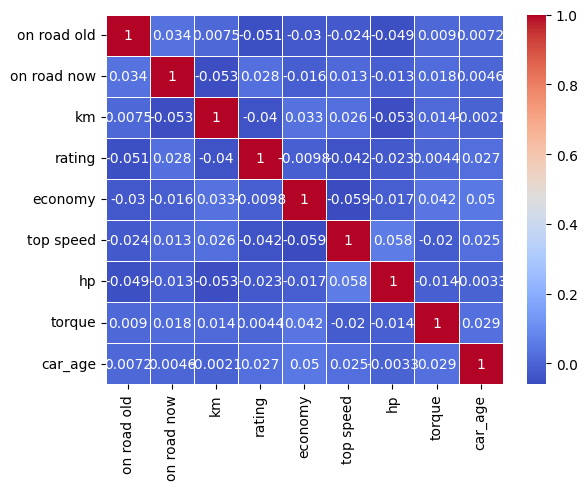

In [33]:
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()

Explanation: Boxplots show the distribution of numeric features by 'condition.' This set of boxplots allows you to compare the distribution of each numeric feature across different conditions.

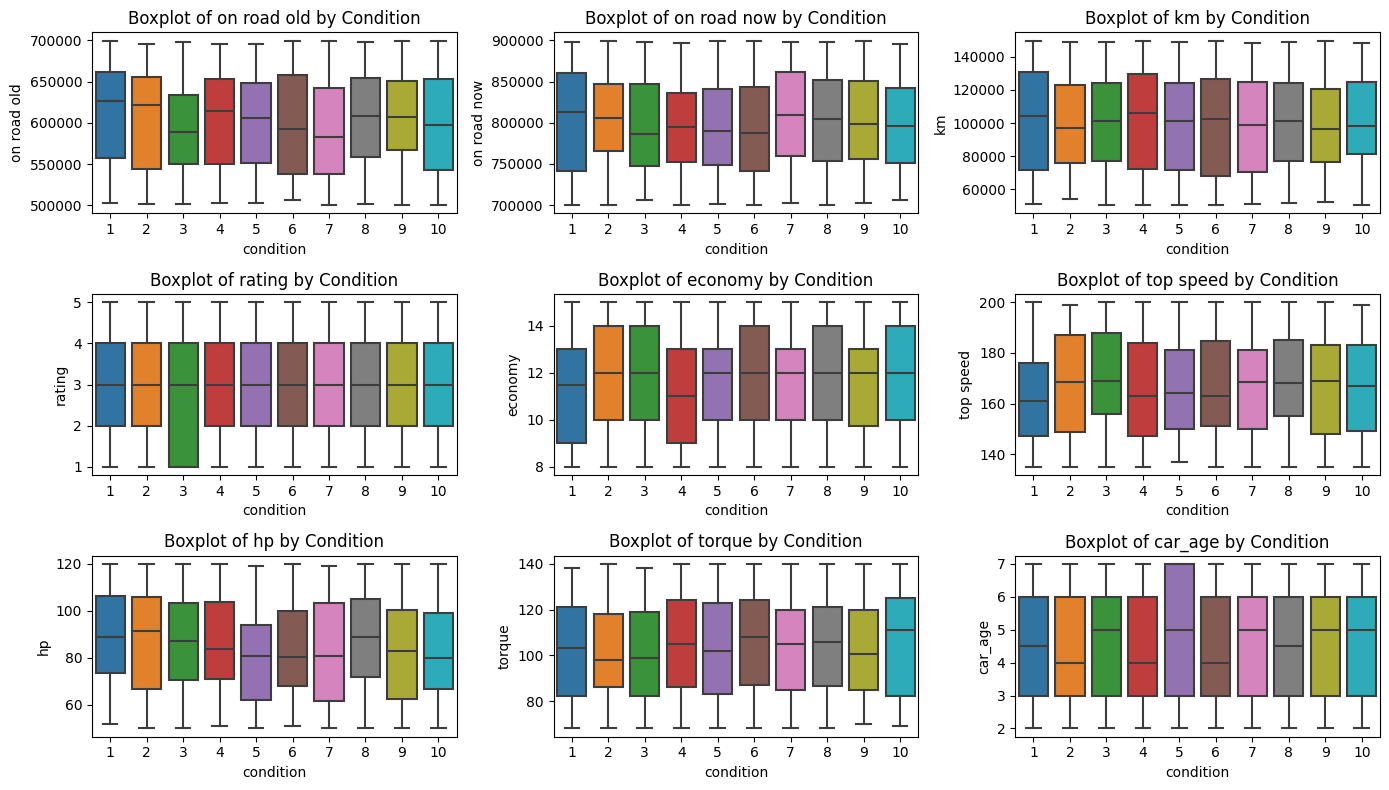

In [34]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='condition', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Condition')
plt.tight_layout()
plt.show()

Explanation: A countplot shows the distribution of categorical values. Here, it visualizes the count of cars in each 'condition,' providing an overview of the dataset's composition.

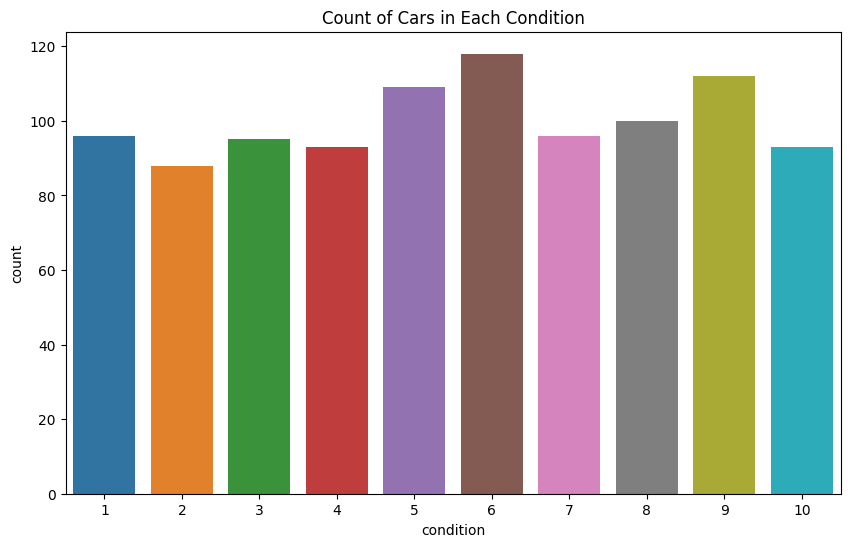

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Count of Cars in Each Condition')
plt.show()

Explanation: This categorical plot, using the kind='box' argument, shows the distribution of 'current price' for each 'condition' using a boxplot. It provides a detailed view of the price distribution within each condition.

<Figure size 1200x800 with 0 Axes>

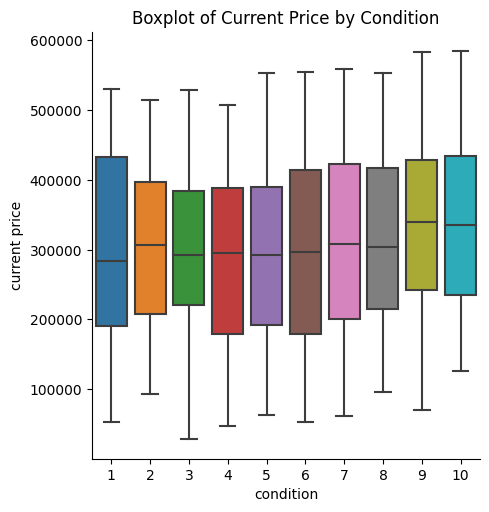

In [37]:
plt.figure(figsize=(12, 8))
sns.catplot(x='condition', y='current price', kind='box', data=df)
plt.title('Boxplot of Current Price by Condition')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

Mean Squared Error (MSE):

In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 80979130.10019743


Mean Absolute Error (MAE):

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 7579.220224028442


Root Mean Squared Error (RMSE):

In [49]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 8998.840486429206


R-squared (Coefficient of Determination):

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.9951829599287694


Explained Variance Score:

In [51]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {explained_variance}")


Explained Variance: 0.9951829610503691


Mean Squared Logarithmic Error (MSLE):

In [52]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)
print(f"Mean Squared Logarithmic Error: {msle}")


Mean Squared Logarithmic Error: 0.0017111140859029004


This is when the linear regression is not doing a great job with the prediction use the below steps to improve the model

Reason:

Capture Nonlinear Relationships: Polynomial features help capture nonlinear relationships between the features, enabling the model to learn more complex patterns in the data.

In [67]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Feature Engineering
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get polynomial feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

Reason:

Categorical Variable Handling: Dummy encoding converts categorical variables into numerical format, allowing them to be used in mathematical models. The drop_first=True parameter avoids multicollinearity issues.

In [65]:
# Create DataFrames with the same columns
X_train_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

# Handling Categorical Variables
X_train_encoded = pd.get_dummies(X_train_df, columns=['condition'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_df, columns=['condition'], drop_first=True)

# Reset indices to avoid alignment issues
X_train_encoded.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Reason:

Regularization: Ridge regression helps prevent overfitting by penalizing large coefficients. Scaling features (StandardScaler) ensures that all features have the same scale

In [66]:
from sklearn.linear_model import Ridge

# Regularization (L2 Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Metrics
y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3710433.929546448
Mean Absolute Error: 1466.3459553712705
Root Mean Squared Error: 1926.2486676300255
R-squared: 0.9997792849972806


Explanation: This scatter plot helps you visually inspect how well your model's predictions align with the actual values. A perfect model would show points along a diagonal line.

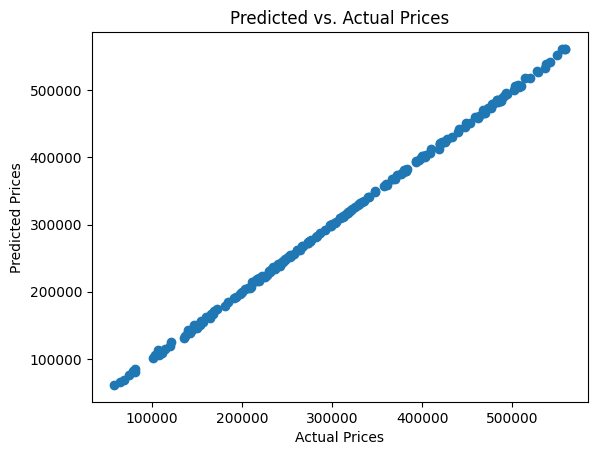

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()


Explanation: The residual plot helps you identify patterns or trends in the errors. Ideally, the residuals should be randomly distributed around the horizontal line at zero.



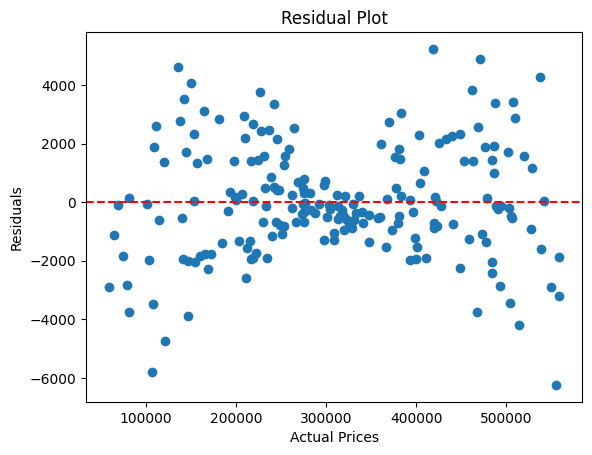

In [70]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Explanation: Examining the distribution of residuals helps ensure that they are approximately normally distributed, which is a key assumption for linear regression.

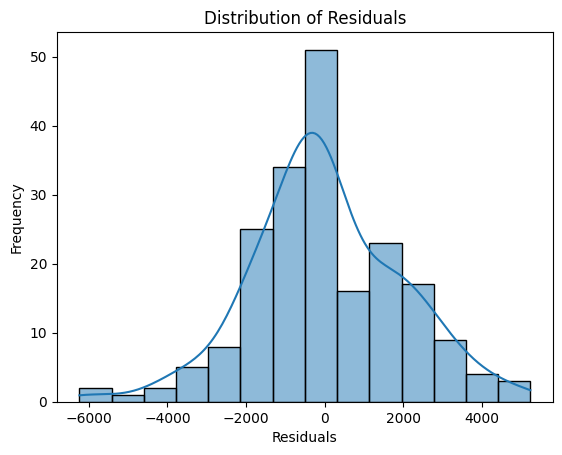

In [71]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
